# Scenario analysis: room swap

In [1]:
import openpyxl as oxl
from histopath_bim_des.config import Config
from histopath_bim_des.model import Model

path = 'config_base.xlsx'
wbook = oxl.load_workbook(path, data_only=True)
config = Config.from_workbook(wbook, sim_hours=10*168, num_reps=30, runner_speed=1.2)

In [2]:
config.runner_times.labelling_scanning

86.89847882754336

From `ifc_parsing.ipynb`, we know the runner times for if we move Digital Scanning to `d17` or `d18`:

In [3]:
config2 = config.model_copy(deep=True)
config3 = config.model_copy(deep=True)
config4 = config.model_copy(deep=True)
config5 = config.model_copy(deep=True)

config2.runner_times.labelling_scanning = 1.839256
config2.runner_times.scanning_qc = 1.839256

config3.runner_times.labelling_scanning = 23.261845
config3.runner_times.scanning_qc = 23.261845

config4.runner_times.labelling_scanning = 5.761845
config4.runner_times.scanning_qc = 5.761845

config5.runner_times.labelling_scanning = 3.922589
config5.runner_times.scanning_qc = 3.922589

In [4]:
import pandas as pd

pd.DataFrame({
    'd16': config.runner_times.model_dump(),
    'd17': config2.runner_times.model_dump(),
    'd18': config3.runner_times.model_dump(),
    'd19': config4.runner_times.model_dump(),
    'd20': config5.runner_times.model_dump()
})

,d16,d17,d18,d19,d20
reception_cutup,8.452306,8.452306,8.452306,8.452306,8.452306
cutup_processing,6.968697,6.968697,6.968697,6.968697,6.968697
processing_microtomy,28.089256,28.089256,28.089256,28.089256,28.089256
microtomy_staining,3.678511,3.678511,3.678511,3.678511,3.678511
staining_labelling,3.678511,3.678511,3.678511,3.678511,3.678511
labelling_scanning,86.898479,1.839256,23.261845,5.761845,3.922589
scanning_qc,86.898479,1.839256,23.261845,5.761845,3.922589
extra_loading,15.000000,15.000000,15.000000,15.000000,15.000000
extra_unloading,15.000000,15.000000,15.000000,15.000000,15.000000


In [5]:
lab_tats = []
specimen_datas = []

for _ in range(config.num_reps):
    model_base = Model(config)
    model_base.run()
    lab_tat_new = [v['qc_end']-v['reception_start']
                   for v in model_base.specimen_data.values() if 'qc_end' in v]
    specimen_datas.append(model_base.specimen_data)
    lab_tats.append(lab_tat_new)

lab_tats2 = []
specimen_datas2 = []

for _ in range(config2.num_reps):
    model2 = Model(config2)
    model2.run()
    lab_tat_new = [v['qc_end']-v['reception_start']
                   for v in model2.specimen_data.values() if 'qc_end' in v]
    specimen_datas2.append(model2.specimen_data)
    lab_tats2.append(lab_tat_new)

lab_tats3 = []
specimen_datas3 = []

for _ in range(config3.num_reps):
    model3 = Model(config3)
    model3.run()
    lab_tat_new = [v['qc_end']-v['reception_start']
                   for v in model3.specimen_data.values() if 'qc_end' in v]
    specimen_datas3.append(model3.specimen_data)
    lab_tats3.append(lab_tat_new)

lab_tats4 = []
specimen_datas4 = []

for _ in range(config4.num_reps):
    model4 = Model(config4)
    model4.run()
    lab_tat_new = [v['qc_end']-v['reception_start']
                   for v in model4.specimen_data.values() if 'qc_end' in v]
    specimen_datas4.append(model4.specimen_data)
    lab_tats4.append(lab_tat_new)

lab_tats5 = []
specimen_datas5 = []

for _ in range(config5.num_reps):
    model5 = Model(config5)
    model5.run()
    lab_tat_new = [v['qc_end']-v['reception_start']
                   for v in model5.specimen_data.values() if 'qc_end' in v]
    specimen_datas5.append(model5.specimen_data)
    lab_tats5.append(lab_tat_new)

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [7]:
lab_tat = np.concatenate(lab_tats)
lab_tat = lab_tat/24.
np.array([np.mean(lab_tat < n) for n in range(28)])

array([0.00000000e+00, 0.00000000e+00, 3.35169287e-04, 6.71130312e-03,
       4.01728101e-02, 7.23332269e-02, 1.18206554e-01, 2.81265093e-01,
       5.02437235e-01, 6.53561636e-01, 7.40652868e-01, 8.07238073e-01,
       8.61171298e-01, 9.02497407e-01, 9.39806763e-01, 9.65057942e-01,
       9.76063107e-01, 9.84281352e-01, 9.90327595e-01, 9.94602983e-01,
       9.97875502e-01, 9.99268961e-01, 9.99804705e-01, 9.99873322e-01,
       9.99907631e-01, 9.99931383e-01, 9.99970970e-01, 9.99986804e-01])

In [8]:
lab_tat2 = np.concatenate(lab_tats2)
lab_tat2 = lab_tat2/24.

lab_tat3 = np.concatenate(lab_tats3)
lab_tat3 = lab_tat3/24.

lab_tat4 = np.concatenate(lab_tats4)
lab_tat4 = lab_tat4/24.

lab_tat5 = np.concatenate(lab_tats5)
lab_tat5 = lab_tat5/24.

In [43]:
mat1 = np.array([[np.mean(np.array(lab_tats[i])/24. < n) for n in [7,10,14]] for i in range(30)])
mat2 = np.array([[np.mean(np.array(lab_tats2[i])/24. < n) for n in [7,10,14]] for i in range(30)])
mat3 = np.array([[np.mean(np.array(lab_tats3[i])/24. < n) for n in [7,10,14]] for i in range(30)])
mat4 = np.array([[np.mean(np.array(lab_tats4[i])/24. < n) for n in [7,10,14]] for i in range(30)])
mat5 = np.array([[np.mean(np.array(lab_tats5[i])/24. < n) for n in [7,10,14]] for i in range(30)])

# mat2 = mat2 - mat1
# mat3 = mat3 - mat1
# mat4 = mat4 - mat1
# mat5 = mat5 - mat1

means1 = np.mean(mat1, axis=0)
means2 = np.mean(mat2, axis=0)
means3 = np.mean(mat3, axis=0)
means4 = np.mean(mat4, axis=0)
means5 = np.mean(mat5, axis=0)

ci1 = [
    stats.t.interval(0.95, loc=np.mean(x:=mat1[:,col]), scale=stats.sem(x), df=len(x))
    for col in range(3)
]
yerr1 = np.array([v[1] for v in ci1])-means1

ci2 = [
    stats.t.interval(0.95, loc=np.mean(x:=mat2[:,col]), scale=stats.sem(x), df=len(x))
    for col in range(3)
]
yerr2 = np.array([v[1] for v in ci2])-means2

ci3 = [
    stats.t.interval(0.95, loc=np.mean(x:=mat3[:,col]), scale=stats.sem(x), df=len(x))
    for col in range(3)
]
yerr3 = np.array([v[1] for v in ci3])-means3

ci4 = [
    stats.t.interval(0.95, loc=np.mean(x:=mat4[:,col]), scale=stats.sem(x), df=len(x))
    for col in range(3)
]
yerr4 = np.array([v[1] for v in ci4])-means4

ci5 = [
    stats.t.interval(0.95, loc=np.mean(x:=mat5[:,col]), scale=stats.sem(x), df=len(x))
    for col in range(3)
]
yerr5 = np.array([v[1] for v in ci5])-means5

In [44]:
[means1, means2, means3, means4, means5]

[array([0.28062577, 0.73976332, 0.93956155]),
 array([0.31309323, 0.78796501, 0.95720552]),
 array([0.33516091, 0.79388036, 0.95697312]),
 array([0.29990456, 0.77754026, 0.95489729]),
 array([0.31843857, 0.79323669, 0.95896265])]

In [46]:
[yerr1, yerr2, yerr3, yerr4, yerr5]

[array([0.02319587, 0.02346695, 0.00689501]),
 array([0.03566573, 0.02315175, 0.00520157]),
 array([0.0417254 , 0.02321528, 0.00440195]),
 array([0.0416377 , 0.0316869 , 0.00673362]),
 array([0.03444911, 0.02188988, 0.00403118])]

In [59]:
doors = [
    'd16 Digital pathology (base case)',
    'd17 Block & slide',
    'd18 Ventilated stores',
    'd19 Main lab section leaders',
    'd20 Filing room'
]

y_df = pd.DataFrame(
    np.array([means1, means2, means3, means4, means5]).T,
    index=[7,10,14],
    columns=doors
)

yerr_df = pd.DataFrame(
    np.array([yerr1, yerr2, yerr3, yerr4, yerr5]).T,
    index=[7,10,14],
    columns=doors
)

<Axes: xlabel='Elapsed time [days]', ylabel='Proportion of specimens completed'>

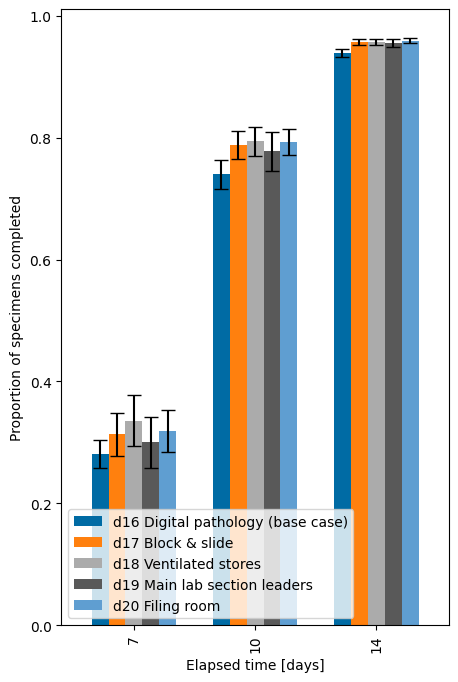

In [60]:
plt.style.use('tableau-colorblind10')
fig = plt.figure(figsize=(5,8))
ax = fig.subplots()

y_df.plot(ax=ax, kind='bar',yerr=yerr_df, capsize=5, width=0.7,
          xlabel='Elapsed time [days]', ylabel='Proportion of specimens completed')

In [62]:
y_df.to_feather('room_swap.means.feather')
yerr_df.to_feather('room_swap.err.feather')